**Project 7: Car Price Predictor**

---



     Vikash Kumar


---


**Importing the packages of the dependencies**

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt
from sklearn import metrics   # for calculation part

**Data Collection and Processing**

In [4]:
# loading the dataset to the pandas dataframe
car_dataset = pd.read_csv('/content/car data.csv')

In [38]:
# Top 5 rows of the dataset
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [6]:
# Checking the total rows and columns of the dataset
car_dataset.shape

(301, 9)

In [7]:
# Getting information of the dataset
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# Checking the total number of the null values in the dataset
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [9]:
# Checking the distribution of the columns in the dataset
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())
print(car_dataset.Car_Name.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64
city                26
corolla altis       16
verna               14
fortuner            11
brio                10
                    ..
Yamaha Fazer         1
baleno               1
Honda CB Trigger     1
Honda CB Unicorn     1
ignis                1
Name: Car_Name, Length: 98, dtype: int64


**Encoding the categorical data to the Numerical DAta**

In [10]:
# Encoding the Fuel_Type 
car_dataset.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)

# Encoding the Transmission_Type 
car_dataset.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

# Encoding the Seller_Type 
car_dataset.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)

In [11]:
# Checking the encoding data
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**Splitting the Data and Target**

In [12]:
X = car_dataset.drop(['Car_Name','Selling_Price'],axis=1)
Y = car_dataset['Selling_Price']

In [13]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  ...  Seller_Type  Transmission  Owner
0    2014           5.59       27000  ...            0             0      0
1    2013           9.54       43000  ...            0             0      0
2    2017           9.85        6900  ...            0             0      0
3    2011           4.15        5200  ...            0             0      0
4    2014           6.87       42450  ...            0             0      0
..    ...            ...         ...  ...          ...           ...    ...
296  2016          11.60       33988  ...            0             0      0
297  2015           5.90       60000  ...            0             0      0
298  2009          11.00       87934  ...            0             0      0
299  2017          12.50        9000  ...            0             0      0
300  2016           5.90        5464  ...            0             0      0

[301 rows x 7 columns]
0       3.35
1       4.75
2       7.25
3       2.85
4       4.60

**Splitting the Test and Train data**

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=3)

**Model Training**
  
       1. Linear Regression
       

In [15]:
# Loading the linear regression
lin_reg_model = LinearRegression()

In [16]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

**Model Evaluation**

In [17]:
# Prediction on Training Data
training_data_prediction = lin_reg_model.predict(X_train)

In [18]:
# R Squarred Error as the model is the not classifier instead discreate value
error_score = metrics.r2_score(Y_train, training_data_prediction)

In [19]:
print("The error score of the R Squared Error is : ",error_score)

The error score of the R Squared Error is :  0.8850493456998683


**Visualize the actual price and predicted data**

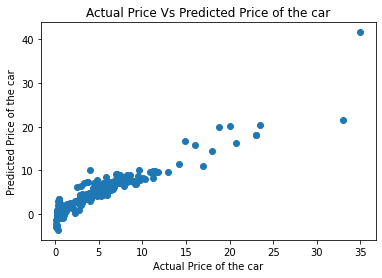

In [23]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price of the car")
plt.ylabel("Predicted Price of the car")
plt.title("Actual Price Vs Predicted Price of the car")
plt.show()

In [24]:
# Prediction of the test data
test_data_prediction = lin_reg_model.predict(X_test)

In [26]:
# R squared Error of the test data
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8434910870906726


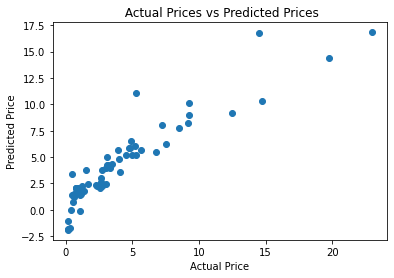

In [27]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

**2. Lasso Regression**

In [28]:
# loading the lasso regression model
lass_reg_model = Lasso()

In [30]:
# Training the data
lass_reg_model.fit(X_train,Y_train)  

Lasso()

**Model Evaluation**

In [31]:
# prediction on Training data
training_data_prediction = lass_reg_model.predict(X_train)

In [33]:
# R squared Error of the training data using Lasso Regression
error_score = metrics.r2_score(Y_train, training_data_prediction)
print("R squared Error of the trained data : ", error_score)

R squared Error of the trained data :  0.8489270481716822


**Visualize the Actual prices and Predicted prices**

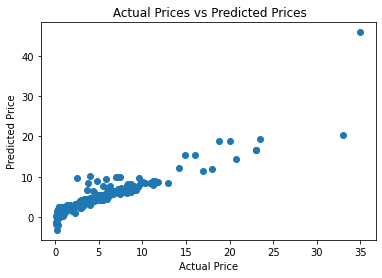

In [34]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()

In [35]:
# prediction on Training data
test_data_prediction = lass_reg_model.predict(X_test)

In [36]:
# R squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8137283846309922


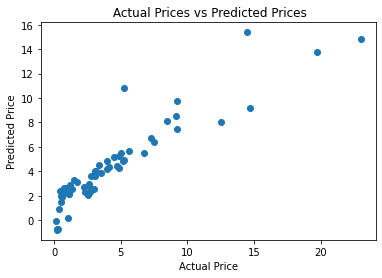

In [37]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title(" Actual Prices vs Predicted Prices")
plt.show()